<a href="https://colab.research.google.com/github/OscarTMa/AB-Testing/blob/main/notebooks/ab_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A/B Testing Notebook Structure**

In [1]:
# Install kagglehub
!pip install kagglehub

# Import kagglehub and download the dataset
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("zhangluyuan/ab-testing")

print("Path to dataset files:", path)

100%|██████████| 4.04M/4.04M [00:00<00:00, 103MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zhangluyuan/ab-testing/versions/1


**1. Import Libraries and Load the Dataset**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file from the downloaded path
ab_data = pd.read_csv(f"{path}/ab_data.csv")
ab_data.head()  # Display the first few rows


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**2. Exploratory Data Analysis (EDA)**

*    Check the basic info, dataset size, and any missing data.
*    Visualize the distribution of key metrics for both control and treatment groups.
python



In [4]:
# Basic information about the dataset
print(ab_data.info())

# Summary statistics of numeric variables
print(ab_data.describe())

# Check unique values in key columns
print(ab_data['group'].value_counts())  # For distribution of control and treatment groups

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None
             user_id      converted
count  294478.000000  294478.000000
mean   787974.124733       0.119659
std     91210.823776       0.324563
min    630000.000000       0.000000
25%    709032.250000       0.000000
50%    787933.500000       0.000000
75%    866911.750000       0.000000
max    945999.000000       1.000000
group
treatment    147276
control      147202
Name: count, dtype: int64


**3. A/B Test**

*   Calculate the mean of the metric of interest for both groups.
*   Conduct a hypothesis test (e.g., two-sample t-test) to determine if the difference in means is statistically significant.

In [6]:
# Separate data by group
control = ab_data[ab_data['group'] == 'control']
treatment = ab_data[ab_data['group'] == 'treatment']

# Calculate the mean conversion rate for each group
control_mean = control['converted'].mean()
treatment_mean = treatment['converted'].mean()

print("Conversion Rate Mean - Control:", control_mean)
print("Conversion Rate Mean - Treatment:", treatment_mean)

# Perform a two-sample t-test
from scipy import stats
t_stat, p_val = stats.ttest_ind(control['converted'], treatment['converted'], equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)


Conversion Rate Mean - Control: 0.12039917935897611
Conversion Rate Mean - Treatment: 0.11891957956489856
t-statistic: 1.2369191070650907
p-value: 0.21611810218868657


**4.Result Visualization**

*    Use charts to visualize the differences between groups, such as a bar chart of means and a histogram of distributions.

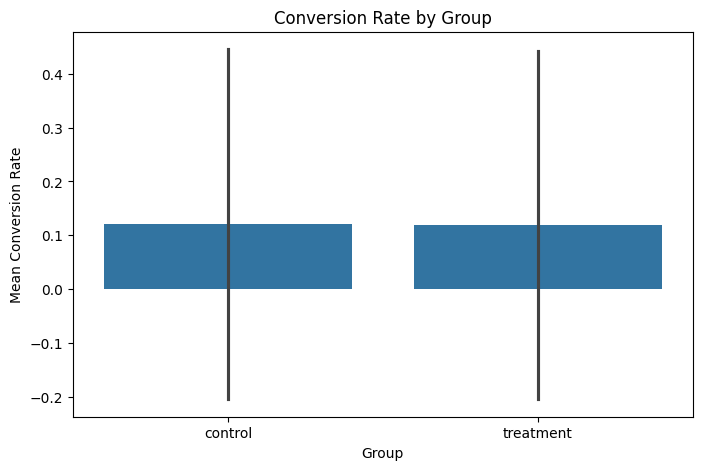

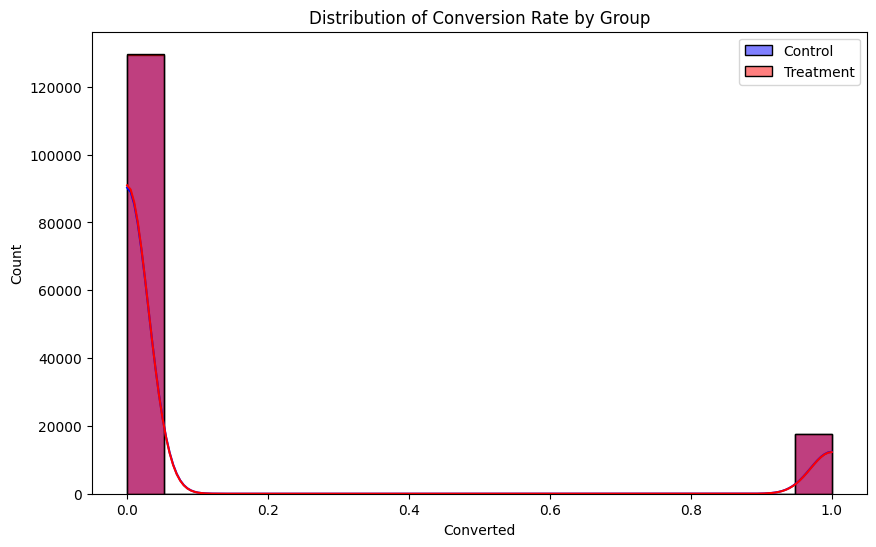

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of the mean conversion rates by group with updated error bar syntax
plt.figure(figsize=(8, 5))
sns.barplot(data=ab_data, x='group', y='converted', errorbar='sd')
plt.title("Conversion Rate by Group")
plt.ylabel("Mean Conversion Rate")
plt.xlabel("Group")
plt.show()

# Histogram of the conversion distribution by group
plt.figure(figsize=(10, 6))
sns.histplot(control['converted'], color="blue", label="Control", kde=True)
sns.histplot(treatment['converted'], color="red", label="Treatment", kde=True)
plt.legend()
plt.title("Distribution of Conversion Rate by Group")
plt.xlabel("Converted")
plt.show()


**Explanation:**

*    Bar Plot: It displays the mean conversion rate for each group (control and treatment) using the converted column.
*    Histogram: It plots the distribution of conversions within each group, showing the distribution of converted values (0 or 1) and the kernel density estimate (KDE) to visualize differences between groups.